### **Project Title**: Predicting NYC Rideshare Prices Using Subway Delays, Ridership, and Weather Conditions 
#### ***NYC Weather Data***

#### **Source**: Visual Crossing 

<img src="PoweredByVC-WeatherLogo-RoundedRect.png" alt="Alt Text" width="500" height="150">

#### **Website**: https://www.visualcrossing.com/
#### **About**: 
##### Visual Crossing is a leading provider of weather data and enterprise analysis tools to data scientists, business analysts, professionals, and academics. Visual Crossing aims to provide accurate weather data and forecasts by combining data from various sources, including ground-based weather stations, satellites, and radar, and using statistical climate modeling.

#### **Weather Data Use Case**: 
##### Weather data in this project is used to identify how conditions affect rideshare pricing in NYC. It helps capture demand spikes and travel delays caused by adverse weather. This allows for more accurate fare predictions and better planning for both riders and service providers.




### **Exploratory Data Analysis and Preprocessing**

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('New York, ny 2020-01-01 to 2024-12-31.csv')
print(df.head())


           name             datetime  temp  feelslike   dew  humidity  precip  \
0  New York, ny  2020-01-01T00:00:00  41.2       34.7  27.9     58.99     0.0   
1  New York, ny  2020-01-01T01:00:00  39.8       33.9  25.9     57.17     0.0   
2  New York, ny  2020-01-01T02:00:00  39.2       32.8  26.8     60.71     0.0   
3  New York, ny  2020-01-01T03:00:00  39.1       30.9  25.9     58.85     0.0   
4  New York, ny  2020-01-01T04:00:00  38.9       31.4  23.9     54.59     0.0   

   precipprob preciptype  snow  ...  sealevelpressure  cloudcover  visibility  \
0           0        NaN   0.0  ...            1003.5        97.9         9.9   
1           0        NaN   0.0  ...            1003.7        92.1         9.9   
2           0        NaN   0.0  ...            1004.0        85.4         9.9   
3           0        NaN   0.0  ...            1004.3        54.9         9.9   
4           0        NaN   0.0  ...            1004.8        97.9         9.9   

   solarradiation  solaren

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              43848 non-null  object 
 1   datetime          43848 non-null  object 
 2   temp              43848 non-null  float64
 3   feelslike         43848 non-null  float64
 4   dew               43848 non-null  float64
 5   humidity          43848 non-null  float64
 6   precip            43848 non-null  float64
 7   precipprob        43848 non-null  int64  
 8   preciptype        4296 non-null   object 
 9   snow              43848 non-null  float64
 10  snowdepth         43848 non-null  float64
 11  windgust          43691 non-null  float64
 12  windspeed         43848 non-null  float64
 13  winddir           43848 non-null  float64
 14  sealevelpressure  43848 non-null  float64
 15  cloudcover        43848 non-null  float64
 16  visibility        43848 non-null  float6

In [4]:
print(df.columns.tolist())

# location: new york, ny
# columns to focus on: 
# name - remove
# datetime
# temp
# feelslike
# dew - remove
# humidity - remove
# precip
# precipprob - remove
# preciptype 
# snow
# snowdepth - remove
# windgust - remove
# windspeed 
# winddir - remove
# sealevelpressure - remove
# cloudcover
# visibility
# solarradiation - remove
# solarenergy - remove
# uvindex 
# severerisk - remove
# conditions
# icon - remove
# stations - remove

['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']


In [5]:
# Drop columns not needed 

columns_to_drop = [
    'name',
    'dew',
    'humidity',
    'precipprob',
    'snowdepth',
    'windgust',
    'winddir',
    'sealevelpressure',
    'solarradiation',
    'solarenergy',
    'severerisk',
    'icon',
    'stations',
    'preciptype'
]

df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned

,datetime,temp,feelslike,precip,snow,windspeed,cloudcover,visibility,uvindex,conditions
0,2020-01-01T00:00:00,41.2,34.7,0.000,0.0,10.9,97.9,9.9,0,Overcast
1,2020-01-01T01:00:00,39.8,33.9,0.000,0.0,9.1,92.1,9.9,0,Overcast
2,2020-01-01T02:00:00,39.2,32.8,0.000,0.0,9.7,85.4,9.9,0,Partially cloudy
3,2020-01-01T03:00:00,39.1,30.9,0.000,0.0,14.3,54.9,9.9,0,Partially cloudy
4,2020-01-01T04:00:00,38.9,31.4,0.000,0.0,12.2,97.9,9.9,0,Overcast
...,...,...,...,...,...,...,...,...,...,...
43843,2024-12-31T19:00:00,48.7,44.9,0.000,0.0,8.6,15.4,9.9,0,Clear
43844,2024-12-31T20:00:00,47.4,43.8,0.000,0.0,7.7,97.9,9.9,0,Overcast
43845,2024-12-31T21:00:00,45.0,41.7,0.033,0.0,6.0,100.0,4.8,0,"Rain, Overcast"
43846,2024-12-31T22:00:00,44.1,40.4,0.068,0.0,6.5,100.0,1.6,0,"Rain, Overcast"


In [6]:
# reformat data and time column to be formatted like (2020-01-01 00:30:00) to match TLC data

df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')

# remove possible duplicates ( ~ 5)

df_cleaned = df_cleaned.drop_duplicates(subset='datetime')
df_cleaned


,datetime,temp,feelslike,precip,snow,windspeed,cloudcover,visibility,uvindex,conditions
0,2020-01-01 00:00:00,41.2,34.7,0.000,0.0,10.9,97.9,9.9,0,Overcast
1,2020-01-01 01:00:00,39.8,33.9,0.000,0.0,9.1,92.1,9.9,0,Overcast
2,2020-01-01 02:00:00,39.2,32.8,0.000,0.0,9.7,85.4,9.9,0,Partially cloudy
3,2020-01-01 03:00:00,39.1,30.9,0.000,0.0,14.3,54.9,9.9,0,Partially cloudy
4,2020-01-01 04:00:00,38.9,31.4,0.000,0.0,12.2,97.9,9.9,0,Overcast
...,...,...,...,...,...,...,...,...,...,...
43843,2024-12-31 19:00:00,48.7,44.9,0.000,0.0,8.6,15.4,9.9,0,Clear
43844,2024-12-31 20:00:00,47.4,43.8,0.000,0.0,7.7,97.9,9.9,0,Overcast
43845,2024-12-31 21:00:00,45.0,41.7,0.033,0.0,6.0,100.0,4.8,0,"Rain, Overcast"
43846,2024-12-31 22:00:00,44.1,40.4,0.068,0.0,6.5,100.0,1.6,0,"Rain, Overcast"


In [7]:
# list unique values in 'conditions' column
print(sorted(df_cleaned['conditions'].dropna().unique()))

# assign an int to each unique condition
unique_conditions = df_cleaned['conditions'].unique()
condition_mapping = {condition: i for i, condition in enumerate(unique_conditions)}

# replace values in 'conditions' column in dataframe to match condition numbers
df_cleaned['conditions'] = df_cleaned['conditions'].map(condition_mapping)

print(condition_mapping)
df_cleaned

['Clear', 'Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast', 'Rain, Partially cloudy', 'Snow', 'Snow, Overcast', 'Snow, Partially cloudy', 'Snow, Rain', 'Snow, Rain, Overcast', 'Snow, Rain, Partially cloudy']
{'Overcast': 0, 'Partially cloudy': 1, 'Clear': 2, 'Rain, Overcast': 3, 'Rain, Partially cloudy': 4, 'Snow, Rain, Partially cloudy': 5, 'Snow, Rain, Overcast': 6, 'Snow, Overcast': 7, 'Snow, Partially cloudy': 8, 'Rain': 9, 'Snow': 10, 'Snow, Rain': 11}


/tmp/ipykernel_28219/2537222102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['conditions'] = df_cleaned['conditions'].map(condition_mapping)


,datetime,temp,feelslike,precip,snow,windspeed,cloudcover,visibility,uvindex,conditions
0,2020-01-01 00:00:00,41.2,34.7,0.000,0.0,10.9,97.9,9.9,0,0
1,2020-01-01 01:00:00,39.8,33.9,0.000,0.0,9.1,92.1,9.9,0,0
2,2020-01-01 02:00:00,39.2,32.8,0.000,0.0,9.7,85.4,9.9,0,1
3,2020-01-01 03:00:00,39.1,30.9,0.000,0.0,14.3,54.9,9.9,0,1
4,2020-01-01 04:00:00,38.9,31.4,0.000,0.0,12.2,97.9,9.9,0,0
...,...,...,...,...,...,...,...,...,...,...
43843,2024-12-31 19:00:00,48.7,44.9,0.000,0.0,8.6,15.4,9.9,0,2
43844,2024-12-31 20:00:00,47.4,43.8,0.000,0.0,7.7,97.9,9.9,0,0
43845,2024-12-31 21:00:00,45.0,41.7,0.033,0.0,6.0,100.0,4.8,0,3
43846,2024-12-31 22:00:00,44.1,40.4,0.068,0.0,6.5,100.0,1.6,0,3


In [8]:
# check for outliers

import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ['temp', 'feelslike', 'precip', 'snow', 'windspeed',
                 'cloudcover', 'visibility', 'uvindex', 'conditions']

outlier_counts = {}

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

for col in cols_to_check:
    if pd.api.types.is_numeric_dtype(df_cleaned[col]):
        outliers = detect_outliers(df_cleaned[col])
        outlier_counts[col] = len(outliers)

outlier_counts

# in this case, if outliers were removed, there would be a break in the hourly datetime column
# existing columns have realtime measured data, outliers remained for now


{'temp': 0,
 'feelslike': 20,
 'precip': 3925,
 'snow': 516,
 'windspeed': 1263,
 'cloudcover': 0,
 'visibility': 8531,
 'uvindex': 4838,
 'conditions': 794}

In [9]:
# check the total number of monthly hours from 1/2/2020 to 12/31/2024; identify missing rows
import calendar

df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'])

# new column for month-year 
df_cleaned['month_year'] = df_cleaned['datetime'].dt.to_period('M')

# Group by the month_year  and count the number of rows 
monthly_hours = df_cleaned.groupby('month_year').size().reset_index(name='actual_hours')

monthly_hours['year'] = monthly_hours['month_year'].dt.year
monthly_hours['month'] = monthly_hours['month_year'].dt.month

# Calculate expected hours: number of days in the month multiplied by 24
monthly_hours['expected_hours'] = monthly_hours.apply(
    lambda row: calendar.monthrange(row['year'], row['month'])[1] * 24, axis=1
)

monthly_hours = monthly_hours[['month_year', 'actual_hours', 'expected_hours']]

monthly_hours


/tmp/ipykernel_28219/1681780155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'])
/tmp/ipykernel_28219/1681780155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month_year'] = df_cleaned['datetime'].dt.to_period('M')


,month_year,actual_hours,expected_hours
0,2020-01,744,744
1,2020-02,696,696
2,2020-03,743,744
3,2020-04,720,720
4,2020-05,744,744
5,2020-06,720,720
6,2020-07,744,744
7,2020-08,744,744
8,2020-09,720,720
9,2020-10,744,744


In [10]:
# list the months whose actual hours dont match expected hours

incomplete_months = monthly_hours[monthly_hours['actual_hours'] != monthly_hours['expected_hours']]
print(incomplete_months)

   month_year  actual_hours  expected_hours
2     2020-03           743             744
14    2021-03           743             744
26    2022-03           743             744
38    2023-03           743             744
50    2024-03           743             744


In [11]:
# identify missing dates and times 

full_range = pd.date_range(start=df_cleaned['datetime'].min(), 
                           end=df_cleaned['datetime'].max(), 
                           freq='H')

# missing datetimes
existing = pd.Series(df_cleaned['datetime'].unique())
missing = full_range.difference(existing)

missing_df = pd.DataFrame(missing, columns=['missing_datetime'])

missing_df

# these missing datetimes are the "Daylight Savings time" skips in March of every year

/tmp/ipykernel_28219/858219411.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df_cleaned['datetime'].min(),


,missing_datetime
0,2020-03-08 02:00:00
1,2021-03-14 02:00:00
2,2022-03-13 02:00:00
3,2023-03-12 02:00:00
4,2024-03-10 02:00:00


In [12]:
# make sure all columns besides datetime are 'int'
# average the weather for the hour before and after in these rows and add back to dataframe; 
# confirm no longer missing datetime

# missing times
missing_times = pd.to_datetime([
    "2020-03-08 02:00:00",
    "2021-03-14 02:00:00",
    "2022-03-13 02:00:00",
    "2023-03-12 02:00:00",
    "2024-03-10 02:00:00"
])

# Columns to average
cols_to_avg = [
    'temp', 'feelslike', 'precip', 'snow',
    'windspeed', 'cloudcover', 'visibility',
    'uvindex', 'conditions'
]

# Separate float and int columns
float_cols = ['precip', 'snow']
int_cols = ['temp', 'feelslike', 'windspeed', 'cloudcover', 'visibility', 'uvindex', 'conditions']

# Convert only int columns to int64
df_cleaned[int_cols] = df_cleaned[int_cols].astype('int64')

# Work on a copy
df_filled = df_cleaned.copy()

# rows to add
rows_to_add = []

for dt in missing_times:
    before = df_filled[df_filled['datetime'] == dt - pd.Timedelta(hours=1)]
    after = df_filled[df_filled['datetime'] == dt + pd.Timedelta(hours=1)]

    if not before.empty and not after.empty:
        # Average each type separately
        avg_ints = before[int_cols].reset_index(drop=True).add(
            after[int_cols].reset_index(drop=True)
        ).div(2).round().astype('int64')

        avg_floats = before[float_cols].reset_index(drop=True).add(
            after[float_cols].reset_index(drop=True)
        ).div(2)

        
        avg_row = pd.concat([avg_ints, avg_floats], axis=1)
        avg_row['datetime'] = dt

        rows_to_add.append(avg_row)

# concatenate new rows and append
new_rows_df = pd.concat(rows_to_add, ignore_index=True)
df_filled = pd.concat([df_filled, new_rows_df], ignore_index=True)

df_filled = df_filled.sort_values('datetime').reset_index(drop=True)

# check missing hourly timestamps
full_range = pd.date_range(
    start=df_filled['datetime'].min(),
    end=df_filled['datetime'].max(),
    freq='H'
)

missing_after_fill = pd.DatetimeIndex(full_range).difference(pd.DatetimeIndex(df_filled['datetime']))

print("Missing hourly timestamps count:", len(missing_after_fill))



Missing hourly timestamps count: 0


/tmp/ipykernel_28219/465276334.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[int_cols] = df_cleaned[int_cols].astype('int64')
/tmp/ipykernel_28219/465276334.py:61: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(


In [13]:
# rename new df 

df_weather = df_filled 
df_weather

,datetime,temp,feelslike,precip,snow,windspeed,cloudcover,visibility,uvindex,conditions,month_year
0,2020-01-01 00:00:00,41,34,0.000,0.0,10,97,9,0,0,2020-01
1,2020-01-01 01:00:00,39,33,0.000,0.0,9,92,9,0,0,2020-01
2,2020-01-01 02:00:00,39,32,0.000,0.0,9,85,9,0,1,2020-01
3,2020-01-01 03:00:00,39,30,0.000,0.0,14,54,9,0,1,2020-01
4,2020-01-01 04:00:00,38,31,0.000,0.0,12,97,9,0,0,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
43843,2024-12-31 19:00:00,48,44,0.000,0.0,8,15,9,0,2,2024-12
43844,2024-12-31 20:00:00,47,43,0.000,0.0,7,97,9,0,0,2024-12
43845,2024-12-31 21:00:00,45,41,0.033,0.0,6,100,4,0,3,2024-12
43846,2024-12-31 22:00:00,44,40,0.068,0.0,6,100,1,0,3,2024-12


In [14]:
# check added rows
dst_rows = df_weather[df_weather['datetime'].isin(missing_times)]
print(dst_rows)

# remove month_year column


                 datetime  temp  feelslike  precip  snow  windspeed  \
1610  2020-03-08 02:00:00    36         30   0.000   0.0          6   
10514 2021-03-14 02:00:00    44         36   0.000   0.0         16   
19250 2022-03-13 02:00:00    23          8   0.000   0.0         18   
27986 2023-03-12 02:00:00    36         30   0.000   0.0          7   
36722 2024-03-10 02:00:00    47         45   0.006   0.0          4   

       cloudcover  visibility  uvindex  conditions month_year  
1610            0           9        0           2        NaT  
10514           0           9        0           2        NaT  
19250          64           9        0           0        NaT  
27986          20           9        0           2        NaT  
36722         100           2        0           3        NaT  


In [15]:
# remove month/year column

df_weather = df_weather.drop(columns=['month_year'], errors='ignore')
df_weather



,datetime,temp,feelslike,precip,snow,windspeed,cloudcover,visibility,uvindex,conditions
0,2020-01-01 00:00:00,41,34,0.000,0.0,10,97,9,0,0
1,2020-01-01 01:00:00,39,33,0.000,0.0,9,92,9,0,0
2,2020-01-01 02:00:00,39,32,0.000,0.0,9,85,9,0,1
3,2020-01-01 03:00:00,39,30,0.000,0.0,14,54,9,0,1
4,2020-01-01 04:00:00,38,31,0.000,0.0,12,97,9,0,0
...,...,...,...,...,...,...,...,...,...,...
43843,2024-12-31 19:00:00,48,44,0.000,0.0,8,15,9,0,2
43844,2024-12-31 20:00:00,47,43,0.000,0.0,7,97,9,0,0
43845,2024-12-31 21:00:00,45,41,0.033,0.0,6,100,4,0,3
43846,2024-12-31 22:00:00,44,40,0.068,0.0,6,100,1,0,3


In [16]:
# confirm no missing data (NA's)

missing_values = df_weather.isna().sum()

missing_values = missing_values[missing_values > 0]
len(missing_values)

# there are no columns with missing values


0

In [17]:
# Export clean weather data into .csv

df_weather.to_csv("weather_cleaned.csv", index=False)


In [21]:
# initial data frame ('df') final size 
initial_shape = df.shape
initial_shape


(43848, 24)

In [22]:
# final data frame ('df_weather')

final_shape = df_weather.shape
final_shape

(43848, 10)

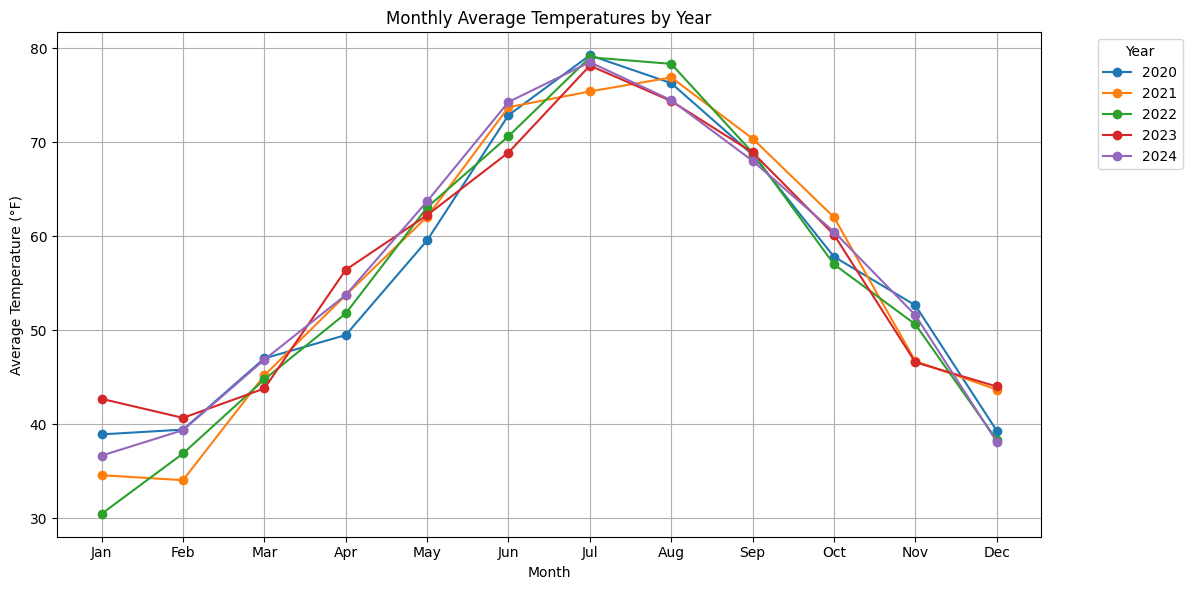

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot Monthly Average temperatures for each year in a line chart
import pandas as pd
import matplotlib.pyplot as plt

df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

df_weather['year'] = df_weather['datetime'].dt.year
df_weather['month'] = df_weather['datetime'].dt.month

monthly_avg_temp = df_weather.groupby(['year', 'month'])['temp'].mean().reset_index()

pivot_table = monthly_avg_temp.pivot(index='month', columns='year', values='temp')

plt.figure(figsize=(12, 6))
for year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[year], marker='o', label=str(year))

plt.title('Monthly Average Temperatures by Year')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.savefig("monthly_avg_temperatures.png", dpi=300, bbox_inches='tight')

